In [1]:
import pandas_profiling
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.subplots as sbl

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report, confusion_matrix, 
precision_score, roc_auc_score, recall_score, roc_curve, precision_recall_curve)


In [2]:
employees = pd.read_csv('HR-Attrition-upsampled-cleaned.csv')
employees.shape

(2466, 21)

In [3]:
employees.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,Married,5130,1,No,23,4,1,3,3,10
1,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,Married,2909,1,Yes,11,3,0,3,3,8
2,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,Married,3468,9,No,12,4,1,3,3,2
3,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,4,Male,3,...,Single,3068,0,No,13,3,0,2,2,7
4,59,No,Travel_Rarely,Research & Development,3,3,Medical,3,Female,4,...,Married,2670,4,Yes,20,1,3,3,2,1


In [4]:
employees.groupby(['RelationshipSatisfaction', 'Attrition'])['Attrition'].agg('count')

RelationshipSatisfaction  Attrition
1                         No           219
                          Yes          293
2                         No           258
                          Yes          240
3                         No           388
                          Yes          357
4                         No           368
                          Yes          343
Name: Attrition, dtype: int64

In [5]:
def transform(row):
    if row['PercentSalaryHike'] < 15:
        val = 'Yes'
    else:
        val = 'No'
    return val

employees['low_percentage_hike'] = employees.apply(transform, axis=1)
employees = employees.drop('PercentSalaryHike', axis=1)

In [6]:
def transform_relation_sat(row):
    if row['RelationshipSatisfaction'] == 1:
        val = 'Yes'
    else:
        val = 'No'
    return val

employees['low_relationship_satisfaction'] = employees.apply(transform_relation_sat, axis=1)
employees = employees.drop('RelationshipSatisfaction', axis=1)

In [7]:
employees.groupby(['BusinessTravel', 'Attrition'])['Attrition'].agg('count')

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           52
Travel_Frequently  No           208
                   Yes          338
Travel_Rarely      No           887
                   Yes          843
Name: Attrition, dtype: int64

In [8]:
def transform_business_travel(row):
    if row['BusinessTravel'] == 'Travel_Frequently':
        val = 'Yes'
    else:
        val = 'No'
    return val

employees['frequent_travel'] = employees.apply(transform_business_travel, axis=1)
employees = employees.drop('BusinessTravel', axis=1)

In [9]:
employees.groupby(['JobInvolvement', 'Attrition'])['Attrition'].agg('count')

JobInvolvement  Attrition
1               No            55
                Yes          131
2               No           304
                Yes          392
3               No           743
                Yes          641
4               No           131
                Yes           69
Name: Attrition, dtype: int64

In [10]:
def transform_job_involve(row):
    if row['JobInvolvement'] == 1:
        val = 'Yes'
    else:
        val = 'No'
    return val

employees['low_job_involvement'] = employees.apply(transform_job_involve, axis=1)
employees = employees.drop('JobInvolvement', axis=1)

In [11]:
employees.groupby(['WorkLifeBalance', 'Attrition'])['Attrition'].agg('count')

WorkLifeBalance  Attrition
1                No            55
                 Yes          132
2                No           286
                 Yes          288
3                No           766
                 Yes          680
4                No           126
                 Yes          133
Name: Attrition, dtype: int64

In [12]:
def transform_wl_balance(row):
    if row['WorkLifeBalance'] == 1:
        val = 'Yes'
    else:
        val = 'No'
    return val

employees['low_worklife_balance'] = employees.apply(transform_wl_balance, axis=1)
employees = employees.drop('WorkLifeBalance', axis=1)

In [13]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 21 columns):
Age                              2466 non-null int64
Attrition                        2466 non-null object
Department                       2466 non-null object
DistanceFromHome                 2466 non-null int64
Education                        2466 non-null int64
EducationField                   2466 non-null object
EnvironmentSatisfaction          2466 non-null int64
Gender                           2466 non-null object
JobSatisfaction                  2466 non-null int64
MaritalStatus                    2466 non-null object
MonthlyIncome                    2466 non-null int64
NumCompaniesWorked               2466 non-null int64
OverTime                         2466 non-null object
StockOptionLevel                 2466 non-null int64
TrainingTimesLastYear            2466 non-null int64
YearsAtCompany                   2466 non-null int64
low_percentage_hike              2466 n

In [14]:
df_num = employees[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 
                    'TrainingTimesLastYear', 'YearsAtCompany']]
df_num.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'TrainingTimesLastYear', 'YearsAtCompany'],
      dtype='object')

In [15]:
categorical = [col for col in employees.columns if col not in df_num.columns]

attrition_cat = employees[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1)
attrition_cat.head()

,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobSatisfaction,MaritalStatus,OverTime,StockOptionLevel,low_percentage_hike,low_relationship_satisfaction,frequent_travel,low_job_involvement,low_worklife_balance
0,Research & Development,1,Life Sciences,3,Male,2,Married,No,1,No,No,Yes,No,No
1,Research & Development,4,Life Sciences,4,Female,3,Married,Yes,0,Yes,No,Yes,No,No
2,Research & Development,1,Medical,1,Male,2,Married,No,1,Yes,No,No,No,No
3,Research & Development,2,Life Sciences,4,Male,4,Single,No,0,Yes,No,Yes,No,No
4,Research & Development,3,Medical,3,Female,1,Married,Yes,3,No,Yes,No,No,No


In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

attrition_cat['Department'] = labelencoder.fit_transform(attrition_cat['Department'])
attrition_cat['EducationField'] = labelencoder.fit_transform(attrition_cat['EducationField'])
attrition_cat['Gender'] = labelencoder.fit_transform(attrition_cat['Gender'])
attrition_cat['MaritalStatus'] = labelencoder.fit_transform(attrition_cat['MaritalStatus'])
attrition_cat['OverTime'] = labelencoder.fit_transform(attrition_cat['OverTime'])
attrition_cat['low_percentage_hike'] = labelencoder.fit_transform(attrition_cat['low_percentage_hike'])
attrition_cat['low_relationship_satisfaction'] = labelencoder.fit_transform(attrition_cat['low_relationship_satisfaction'])
attrition_cat['frequent_travel'] = labelencoder.fit_transform(attrition_cat['frequent_travel'])
attrition_cat['low_job_involvement'] = labelencoder.fit_transform(attrition_cat['low_job_involvement'])
attrition_cat['low_worklife_balance'] = labelencoder.fit_transform(attrition_cat['low_worklife_balance'])

attrition_cat.head()

,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobSatisfaction,MaritalStatus,OverTime,StockOptionLevel,low_percentage_hike,low_relationship_satisfaction,frequent_travel,low_job_involvement,low_worklife_balance
0,1,1,1,3,1,2,1,0,1,0,0,1,0,0
1,1,4,1,4,0,3,1,1,0,1,0,1,0,0
2,1,1,3,1,1,2,1,0,1,1,0,0,0,0
3,1,2,1,4,1,4,2,0,0,1,0,1,0,0
4,1,3,3,3,0,1,1,1,3,0,1,0,0,0


In [17]:
for col in attrition_cat.columns:
    
    if attrition_cat[col].dtypes==int:
        attrition_cat[col] = attrition_cat[col].astype('category')
    print(str(col)+ ": " + str(attrition_cat[col].dtypes))

Department: category
Education: category
EducationField: category
EnvironmentSatisfaction: category
Gender: category
JobSatisfaction: category
MaritalStatus: category
OverTime: category
StockOptionLevel: category
low_percentage_hike: category
low_relationship_satisfaction: category
frequent_travel: category
low_job_involvement: category
low_worklife_balance: category


In [18]:
attrition_cat_dummy = pd.get_dummies(attrition_cat)
attrition_cat_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 43 columns):
Department_0                       2466 non-null uint8
Department_1                       2466 non-null uint8
Department_2                       2466 non-null uint8
Education_1                        2466 non-null uint8
Education_2                        2466 non-null uint8
Education_3                        2466 non-null uint8
Education_4                        2466 non-null uint8
Education_5                        2466 non-null uint8
EducationField_0                   2466 non-null uint8
EducationField_1                   2466 non-null uint8
EducationField_2                   2466 non-null uint8
EducationField_3                   2466 non-null uint8
EducationField_4                   2466 non-null uint8
EducationField_5                   2466 non-null uint8
EnvironmentSatisfaction_1          2466 non-null uint8
EnvironmentSatisfaction_2          2466 non-null uint8
EnvironmentSa

In [19]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df_num.values)
scaled_features

array([[ 1.42370004, -0.20901457, -0.16131462, -0.68976239,  0.19849996,
         0.58668886],
       [-0.2588468 , -0.8124212 , -0.66234239, -0.68976239,  0.19849996,
         0.26822645],
       [-0.88980187, -0.93310252, -0.5362395 ,  2.37778323,  0.19849996,
        -0.68716078],
       ...,
       [-0.99496104,  0.87711735, -0.70024093, -1.07320559, -0.59101762,
         0.10899524],
       [-0.04852844,  0.51507338, -0.47420319, -0.68976239, -0.59101762,
        -0.36869837],
       [-1.83623447, -0.8124212 , -0.96462839, -0.68976239, -0.59101762,
        -1.00562318]])

In [20]:
scaled_features_df_num = pd.DataFrame(scaled_features, index=df_num.index, columns=df_num.columns)
scaled_features_df_num.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany
0,1.423700,-0.209015,-0.161315,-0.689762,0.198500,0.586689
1,-0.258847,-0.812421,-0.662342,-0.689762,0.198500,0.268226
2,-0.889802,-0.933103,-0.536239,2.377783,0.198500,-0.687161
3,-0.364006,-0.933103,-0.626474,-1.073206,-0.591018,0.108995
4,2.475292,-0.812421,-0.716258,0.460567,0.198500,-0.846392


In [21]:
attrition_final = pd.concat([scaled_features_df_num, attrition_cat_dummy], axis=1)
print("Shape of final dataset attrition_final: " + str(attrition_final.shape))
attrition_final.head()

Shape of final dataset attrition_final: (2466, 49)


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,Department_0,Department_1,Department_2,Education_1,...,low_percentage_hike_0,low_percentage_hike_1,low_relationship_satisfaction_0,low_relationship_satisfaction_1,frequent_travel_0,frequent_travel_1,low_job_involvement_0,low_job_involvement_1,low_worklife_balance_0,low_worklife_balance_1
0,1.423700,-0.209015,-0.161315,-0.689762,0.198500,0.586689,0,1,0,1,...,1,0,1,0,0,1,1,0,1,0
1,-0.258847,-0.812421,-0.662342,-0.689762,0.198500,0.268226,0,1,0,0,...,0,1,1,0,0,1,1,0,1,0
2,-0.889802,-0.933103,-0.536239,2.377783,0.198500,-0.687161,0,1,0,1,...,0,1,1,0,1,0,1,0,1,0
3,-0.364006,-0.933103,-0.626474,-1.073206,-0.591018,0.108995,0,1,0,0,...,0,1,1,0,0,1,1,0,1,0
4,2.475292,-0.812421,-0.716258,0.460567,0.198500,-0.846392,0,1,0,0,...,1,0,0,1,1,0,1,0,1,0


In [22]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = employees["Attrition"].apply(lambda x: target_map[x])
target.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [23]:
import plotly.figure_factory as ff

def model_performance_plot(model) : 
    #conf matrix
    conf_matrix = confusion_matrix(target_val, y_pred)
#     trace1 = go.Heatmap(z=conf_matrix  ,x = ["No (pred)","Yes (pred)"],
#                         y = ["No (Actual)","Yes (Actual)"], xgap=2, ygap=2,
#                         colorscale = 'Viridis', 
#                         showscale=False, text=conf_matrix)
#     trace1 = ff.create_annotated_heatmap(conf_matrix, annotation_text=conf_matrix, 
#                                          colorscale=colorscale, hoverinfo='z')
#     for i in range(len(trace1.layout.annotations)):
#         trace1.layout.annotations[i].font.size = 9

    #show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #plot roc curve
    model_roc_auc = round(roc_auc_score(target_val, y_score) , 3)
    fpr, tpr, t = roc_curve(target_val, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : ",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(target_val, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    #subplots
    fig = sbl.make_subplots(rows=3, cols=1, print_grid=False, 
                        subplot_titles=('Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve'))
    

    fig.append_trace(trace2,1,1)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,3,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance</b><br>'+str(model),
                        autosize = False, height = 900,width = 450,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
#     fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis3"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [90]:
def plot_feature_importance(model):
    tmp = pd.DataFrame({'Feature': list(attrition_final_tree), 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(12)
    plt.figure(figsize = (10,12))
    plt.title('Top 30 - Features importance - {0}'.format(model),fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

In [25]:
def plot_confusion_matrix(model):
    conf_matrix = confusion_matrix(target_val, y_pred)
    trace1 = go.Heatmap(z=conf_matrix  ,x = ["No (pred)","Yes (pred)"],
                        y = ["No (Actual)","Yes (Actual)"], xgap=2, ygap=2,
                        colorscale = 'Viridis', 
                        showscale=False, text=conf_matrix)
    trace1 = ff.create_annotated_heatmap(conf_matrix, x = ["No (pred)","Yes (pred)"],
                        y = ["No (Actual)","Yes (Actual)"], xgap=2, ygap=2,
                        colorscale = 'Viridis', 
                        showscale=False, annotation_text=conf_matrix, 
                                         hoverinfo='z')
    trace1['layout'].update(showlegend = False, title = '<b>Model Confusion matrix</b><br>'+str(model).split('(')[0],
                        autosize = True, height = 900,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    # for i in range(len(trace1.layout.annotations)):
    #     trace1.layout.annotations[i].font.size = 9

    trace1.show()

In [26]:
# from sklearn.ensemble import RandomForestClassifier

# seed = 345
# # Random Forest parameters
# rf_params = {
#     'n_jobs': -1,
#     'n_estimators': 100,
# #     'warm_start': True, 
#     'max_features': 0.3,
#     'max_depth': 5,
#     'min_samples_leaf': 2,
#     'max_features' : 'sqrt',
#     'random_state' : seed,
#     'verbose': 0
# }

# rf = RandomForestClassifier(**rf_params)
# # rf = RandomForestClassifier()
# rf.fit(train, target_train)
# print("Fitting of Random Forest finished")

In [27]:
# rf_predictions = rf.predict(test)
# print("Predictions finished")

In [28]:
# print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
# print("="*80)
# print(classification_report(target_val, rf_predictions))

In [29]:
attrition_wo_scaled = pd.concat([df_num, attrition_cat], axis=1)
attrition_wo_scaled.shape

(2466, 20)

In [30]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = attrition_wo_scaled  #independent columns
y = target   #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features
top_features = featureScores[featureScores['Score']>25]
print(top_features['Specs'])

                            Specs          Score
2                   MonthlyIncome  411536.225257
5                  YearsAtCompany     433.389238
0                             Age     306.601455
1                DistanceFromHome     168.847410
13                       OverTime     145.667368
14               StockOptionLevel      90.301831
12                  MaritalStatus      52.232840
19           low_worklife_balance      31.705882
18            low_job_involvement      31.053763
17                frequent_travel      30.952381
9         EnvironmentSatisfaction      22.861395
3              NumCompaniesWorked      20.701826
11                JobSatisfaction      17.644864
16  low_relationship_satisfaction      10.695312
4           TrainingTimesLastYear       6.383004
6                      Department       4.292568
10                         Gender       1.063830
8                  EducationField       0.805780
7                       Education       0.453708
15            low_pe

In [31]:
employees['Department'].value_counts()

Research & Development    1509
Sales                      840
Human Resources            117
Name: Department, dtype: int64

In [32]:
employee_rnd = employees[employees['Department']=='\'Research & Development\'']
print("Before: " + str(employee_rnd.shape))

df_rnd_num = employee_rnd[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 
                    'TrainingTimesLastYear', 'YearsAtCompany']]
# df_rnd_num.columns

categorical = [col for col in employee_rnd.columns if col not in df_rnd_num.columns]

attrition_cat_rnd = employee_rnd[categorical]
attrition_cat_rnd = attrition_cat_rnd.drop(['Attrition'], axis=1)

for col in attrition_cat_rnd.columns:
    
    if attrition_cat_rnd[col].dtypes==int:
        attrition_cat_rnd[col] = attrition_cat_rnd[col].astype('category')
    print(str(col)+ ": " + str(attrition_cat_rnd[col].dtypes))

    
attrition_cat_rnd = pd.get_dummies(attrition_cat_rnd)
attrition_cat_rnd.info()

attrition_final_rnd = pd.concat([df_rnd_num, attrition_cat_rnd], axis=1)
print("Shape of final dataset attrition_final: " + str(attrition_final_rnd.shape))
print(attrition_final_rnd.columns)

target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target_rnd = employee_rnd["Attrition"].apply(lambda x: target_map[x])
target_rnd.value_counts()

Before: (0, 21)
Department: object
Education: category
EducationField: object
EnvironmentSatisfaction: category
Gender: object
JobSatisfaction: category
MaritalStatus: object
OverTime: object
StockOptionLevel: category
low_percentage_hike: object
low_relationship_satisfaction: object
frequent_travel: object
low_job_involvement: object
low_worklife_balance: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Empty DataFrameShape of final dataset attrition_final: (0, 6)
Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'TrainingTimesLastYear', 'YearsAtCompany'],
      dtype='object')


Series([], Name: Attrition, dtype: int64)

In [33]:
employee_rnd.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsAtCompany', 'low_percentage_hike',
       'low_relationship_satisfaction', 'frequent_travel',
       'low_job_involvement', 'low_worklife_balance'],
      dtype='object')

In [34]:
X_rnd = attrition_final_rnd  #independent columns
y_rnd = target_rnd   #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures_rnd = SelectKBest(score_func=chi2, k=20)
fit_rnd = bestfeatures_rnd.fit(X_rnd,y_rnd)
dfscores_rnd = pd.DataFrame(fit_rnd.scores_)
dfcolumns_rnd = pd.DataFrame(X_rnd.columns)
#concat two dataframes for better visualization 
featureScores_rnd = pd.concat([dfcolumns_rnd, dfscores_rnd],axis=1)
featureScores_rnd.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_rnd.nlargest(20,'Score'))

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required.

In [ ]:
employee_sales = employees[employees['Department']=='Sales']

print("Before: " + str(employee_sales.shape))

df_sales_num = employee_sales[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 
                    'TrainingTimesLastYear', 'YearsAtCompany']]
# df_rnd_num.columns

categorical_sales = [col for col in employee_sales.columns if col not in df_sales_num.columns]

attrition_cat_sales = employee_sales[categorical_sales]
attrition_cat_sales = attrition_cat_sales.drop(['Attrition'], axis=1)

for col in attrition_cat_sales.columns:
    
    if attrition_cat_sales[col].dtypes==int:
        attrition_cat_sales[col] = attrition_cat_sales[col].astype('category')
    print(str(col)+ ": " + str(attrition_cat_sales[col].dtypes))

    
attrition_cat_sales = pd.get_dummies(attrition_cat_sales)
attrition_cat_sales.info()

attrition_final_sales = pd.concat([df_sales_num, attrition_cat_sales], axis=1)
print("Shape of final dataset attrition_final: " + str(attrition_final_sales.shape))
print(attrition_final_sales.columns)

target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target_sales = employee_sales["Attrition"].apply(lambda x: target_map[x])
target_sales.value_counts()

In [ ]:
X_sales = attrition_final_sales  #independent columns
y_sales = target_sales   #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures_sales = SelectKBest(score_func=chi2, k=20)
fit_sales = bestfeatures_sales.fit(X_sales,y_sales)
dfscores_sales = pd.DataFrame(fit_sales.scores_)
dfcolumns_sales = pd.DataFrame(X_sales.columns)
#concat two dataframes for better visualization 
featureScores_sales = pd.concat([dfcolumns_sales, dfscores_sales],axis=1)
featureScores_sales.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_sales.nlargest(20,'Score'))

In [ ]:
employee_hr = employees[employees['Department']=='\'Human Resources\'']

print("Before: " + str(employee_hr.shape))

df_num_hr = employee_hr[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 
                    'TrainingTimesLastYear', 'YearsAtCompany']]
# df_rnd_num.columns

categorical_hr = [col for col in employee_hr.columns if col not in df_num_hr.columns]

attrition_cat_hr = employee_hr[categorical_hr]
attrition_cat_hr = attrition_cat_hr.drop(['Attrition'], axis=1)

for col in attrition_cat_hr.columns:
    
    if attrition_cat_hr[col].dtypes==int:
        attrition_cat_hr[col] = attrition_cat_hr[col].astype('category')
    print(str(col)+ ": " + str(attrition_cat_hr[col].dtypes))

    
attrition_cat_hr = pd.get_dummies(attrition_cat_hr)
attrition_cat_hr.info()

attrition_final_hr = pd.concat([df_num_hr, attrition_cat_hr], axis=1)
print("Shape of final dataset attrition_final: " + str(attrition_final_sales.shape))
print(attrition_final_hr.columns)

target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target_hr = employee_hr["Attrition"].apply(lambda x: target_map[x])
target_hr.value_counts()

In [ ]:
employee_hr.columns

In [ ]:
X_hr = attrition_final_hr  #independent columns
y_hr = target_hr   #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures_hr = SelectKBest(score_func=chi2, k=20)
fit_hr = bestfeatures_hr.fit(X_hr,y_hr)
dfscores_hr = pd.DataFrame(fit_hr.scores_)
dfcolumns_hr = pd.DataFrame(X_hr.columns)
#concat two dataframes for better visualization 
featureScores_hr = pd.concat([dfcolumns_hr, dfscores_hr],axis=1)
featureScores_hr.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_hr.nlargest(20,'Score'))

In [ ]:
employee_hr.to_csv('Employee-HR.csv', index=False)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

attrition_final_tree = pd.concat([scaled_features_df_num, attrition_cat], axis=1)
# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final_tree, 
                                                         target, 
                                                         train_size= 0.80, random_state=0)

In [36]:
from sklearn.ensemble import RandomForestClassifier

seed = 345
# Random Forest parameters
rf_params = {
    'criterion': 'entropy',
    'n_jobs': -1,
    'n_estimators': 100,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

rf = RandomForestClassifier(**rf_params)
# rf = RandomForestClassifier()
rf.fit(train, target_train)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [37]:
rf_predictions = rf.predict(test)
print("Predictions finished")

Predictions finished


In [38]:
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.7813765182186235
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       250
           1       0.79      0.76      0.77       244

    accuracy                           0.78       494
   macro avg       0.78      0.78      0.78       494
weighted avg       0.78      0.78      0.78       494



In [39]:
y_pred = rf.predict(test)
y_score = rf.predict_proba(test)[:,1]

model_performance_plot('rf')

In [72]:
rf.feature_importances_

array([0.13552371, 0.04326368, 0.19204697, 0.13798145, 0.05231601,
       0.22203977, 0.0870097 , 0.01202134, 0.02638303, 0.01149322,
       0.04299553, 0.03692559])

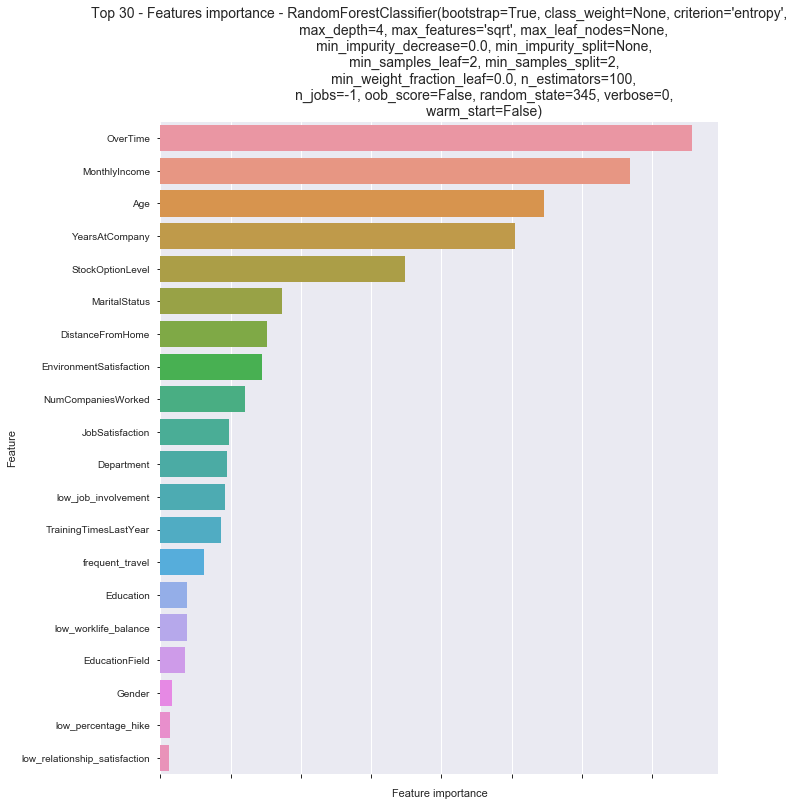

In [40]:
plot_feature_importance(rf)
plot_confusion_matrix(rf)

In [41]:
from sklearn.tree import export_graphviz

export_graphviz(rf.estimators_[0], out_file="rf_tree_after_fs.dot", max_depth=4,feature_names=train.columns, class_names=['0','1'], impurity=False, filled=True)

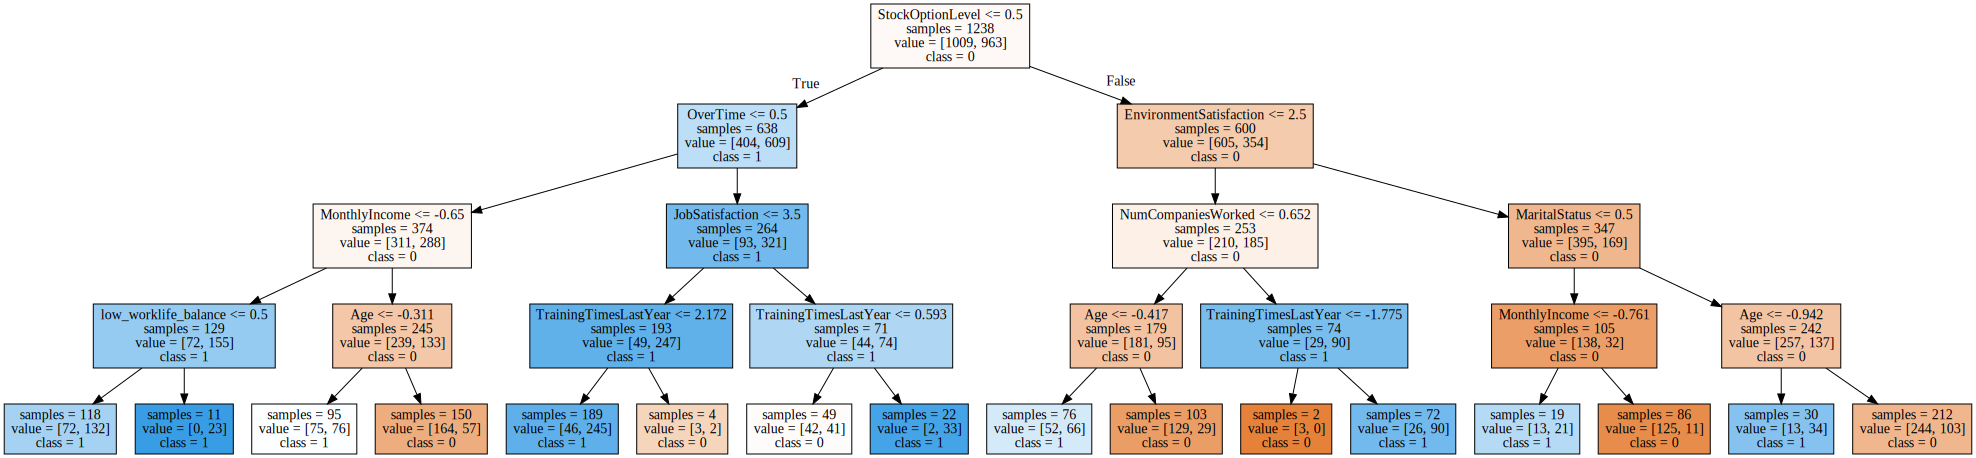

In [42]:
import graphviz
with open("rf_tree_after_fs.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [43]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(train, target_train)
# Get our predictions
gb_predictions = gb.predict(test)
print("Predictions have finished")

Predictions have finished


In [44]:
print(accuracy_score(target_val, gb_predictions))
print(classification_report(target_val, gb_predictions))

0.9595141700404858
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       250
           1       0.92      1.00      0.96       244

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494



In [45]:
y_pred = gb.predict(test)
y_score = gb.predict_proba(test)[:,1]

model_performance_plot('gb')

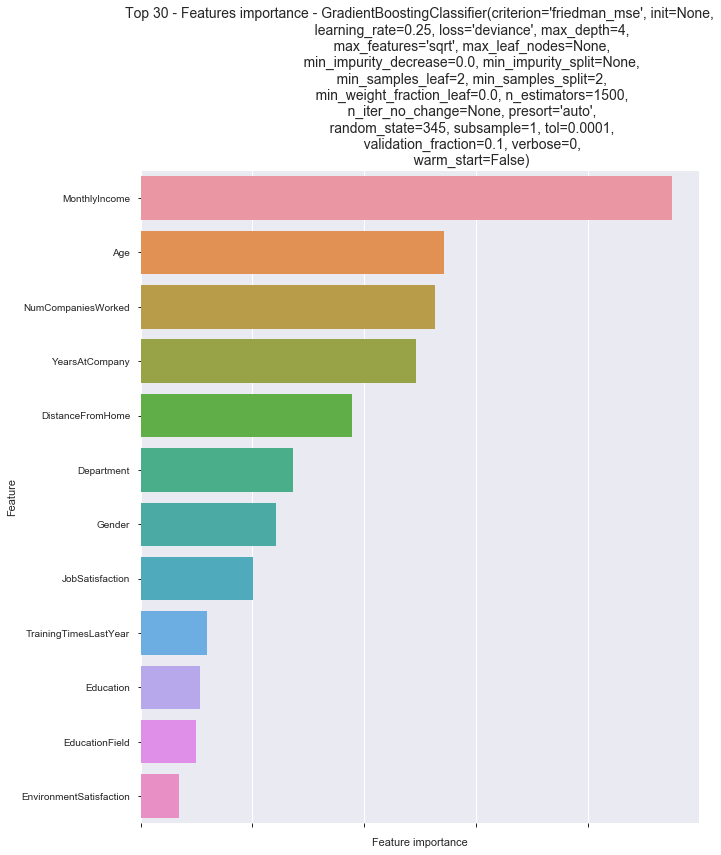

In [84]:
plot_feature_importance(gb)
# gb.feature_importances_
# list(attrition_final_tree)
# len(list(attrition_final_tree))

Decision Tree

In [98]:
from sklearn import tree

tree_params = {
    'criterion': 'entropy',
    'max_depth': 4,
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'random_state': 123
}
tree_clf = tree.DecisionTreeClassifier(**tree_params)

tree_clf.fit(train, target_train)

dec_tree_predictions = tree_clf.predict(test)
print("Predictions finished")

Predictions finished


In [99]:
print(accuracy_score(target_val, dec_tree_predictions))
print(classification_report(target_val, dec_tree_predictions))

0.7327935222672065
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       250
           1       0.78      0.64      0.70       244

    accuracy                           0.73       494
   macro avg       0.74      0.73      0.73       494
weighted avg       0.74      0.73      0.73       494



In [100]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file="decision_tree_orig_final.dot", max_depth=4,feature_names=train.columns, class_names=['0','1'], impurity=False, filled=True)


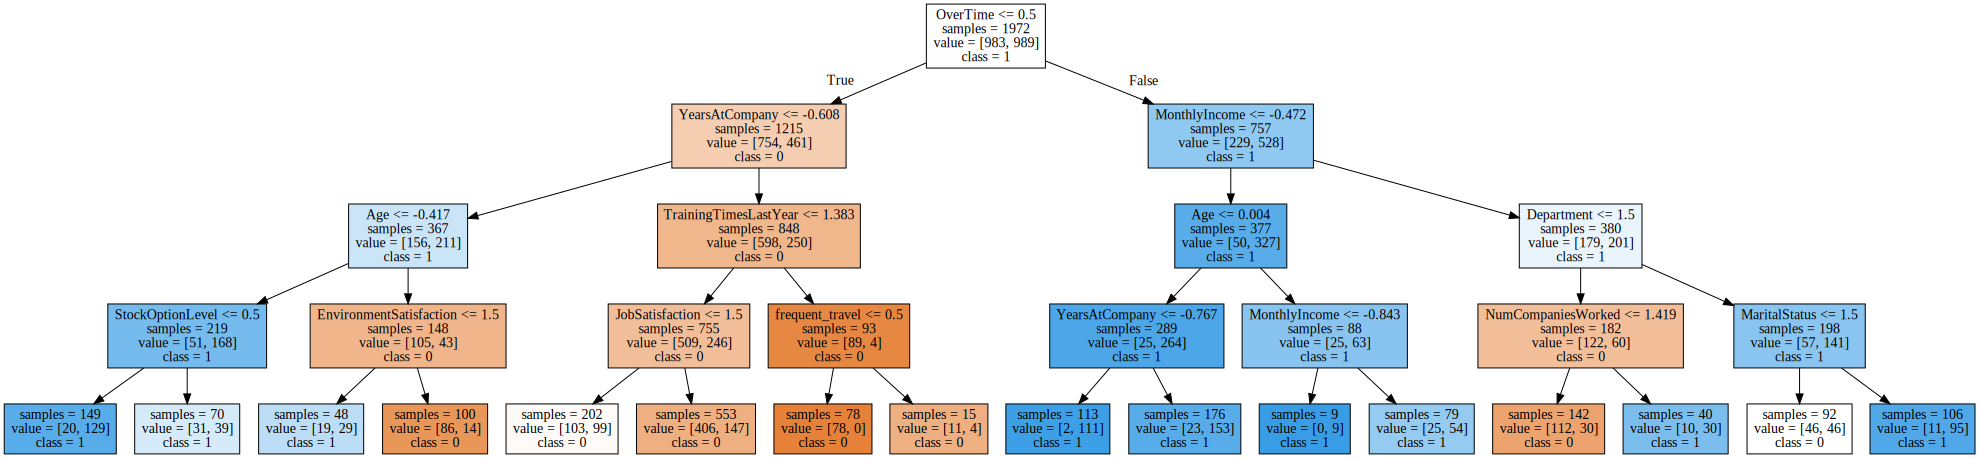

In [101]:
import graphviz
with open("decision_tree_orig_final.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [48]:
y_pred = tree_clf.predict(test)
y_score = tree_clf.predict_proba(test)[:,1]

model_performance_plot('tree_clf')

In [91]:
plot_feature_importance(tree_clf)


ValueError: arrays must all be same length

In [92]:
top_15 = featureScores.nlargest(10,'Score')
T = top_15['Specs'].tolist()

Remove = attrition_final_tree.drop(T, axis=1).columns
attrition_final_reduced = attrition_final_tree.drop(Remove, axis=1)
attrition_final_reduced['EnvironmentSatisfaction'] = attrition_final_tree['EnvironmentSatisfaction']
attrition_final_reduced['JobSatisfaction'] = attrition_final_tree['JobSatisfaction']
attrition_final_reduced.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany',
       'MaritalStatus', 'OverTime', 'StockOptionLevel', 'frequent_travel',
       'low_job_involvement', 'low_worklife_balance',
       'EnvironmentSatisfaction', 'JobSatisfaction'],
      dtype='object')

In [50]:
train_r, test_r, target_train_r, target_val_r = train_test_split(attrition_final_reduced, 
                                                         target, 
                                                         train_size= 0.80, random_state=0)

In [51]:
rf = RandomForestClassifier(**rf_params)
# rf = RandomForestClassifier()
rf.fit(train_r, target_train_r)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [52]:
rf_predictions_r = rf.predict(test_r)
print("Predictions finished")

Predictions finished


In [53]:
print("Accuracy score: {}".format(accuracy_score(target_val_r, rf_predictions_r)))
print("="*80)
print(classification_report(target_val_r, rf_predictions_r))

Accuracy score: 0.7793522267206477
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       250
           1       0.79      0.75      0.77       244

    accuracy                           0.78       494
   macro avg       0.78      0.78      0.78       494
weighted avg       0.78      0.78      0.78       494



In [54]:
y_pred = rf.predict(test_r)
y_score = rf.predict_proba(test_r)[:,1]

model_performance_plot('rf')

In [55]:
tree_clf.fit(train_r, target_train_r)

dec_tree_predictions_r = tree_clf.predict(test_r)
print("Predictions finished")

print(accuracy_score(target_val_r, dec_tree_predictions_r))
print(classification_report(target_val_r, dec_tree_predictions_r))

Predictions finished
0.7469635627530364
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       250
           1       0.74      0.75      0.75       244

    accuracy                           0.75       494
   macro avg       0.75      0.75      0.75       494
weighted avg       0.75      0.75      0.75       494



In [56]:
y_pred = tree_clf.predict(test_r)
y_score = tree_clf.predict_proba(test_r)[:,1]

model_performance_plot('tree_clf')

In [57]:
plot_confusion_matrix(tree_clf)

plot_feature_importance(tree_clf)


ValueError: arrays must all be same length

In [58]:
# Fit the model to our SMOTEd train and target
gb.fit(train_r, target_train_r)
# Get our predictions
gb_predictions_r = gb.predict(test_r)
print("Predictions have finished")

Predictions have finished


In [59]:
print(accuracy_score(target_val_r, gb_predictions_r))
print(classification_report(target_val_r, gb_predictions_r))

0.9433198380566802
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       250
           1       0.90      1.00      0.95       244

    accuracy                           0.94       494
   macro avg       0.95      0.94      0.94       494
weighted avg       0.95      0.94      0.94       494



In [60]:
y_pred = gb.predict(test_r)
y_score = gb.predict_proba(test_r)[:,1]

model_performance_plot('gb')

In [61]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(train, target_train)
# Get our predictions
log_predictions = log_reg.predict(test)
print("Predictions have finished")

Predictions have finished


/Users/dimple/Documents/Foundations of Business Analytics/final_bana200/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [62]:
print(accuracy_score(target_val, log_predictions))
print(classification_report(target_val, log_predictions))

0.742914979757085
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       250
           1       0.73      0.77      0.75       244

    accuracy                           0.74       494
   macro avg       0.74      0.74      0.74       494
weighted avg       0.74      0.74      0.74       494



In [63]:
log_reg = LogisticRegression()

log_reg.fit(train_r, target_train_r)
# Get our predictions
log_predictions_r = log_reg.predict(test_r)
print("Predictions have finished")

Predictions have finished


/Users/dimple/Documents/Foundations of Business Analytics/final_bana200/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [64]:
print(accuracy_score(target_val_r, log_predictions_r))
print(classification_report(target_val_r, log_predictions_r))

0.7267206477732794
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       250
           1       0.72      0.74      0.73       244

    accuracy                           0.73       494
   macro avg       0.73      0.73      0.73       494
weighted avg       0.73      0.73      0.73       494



In [86]:
model_performance_plot('log_reg')

In [87]:
plot_feature_importance(log_reg)


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [65]:
y_pred = tree_clf.predict(test_r)
y_score = tree_clf.predict_proba(test_r)[:,1]

model_performance_plot('tree_clf')